In [1]:
import pandas as pd

In [59]:
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [2]:
path_to_data = '..//DATA/' 

In [61]:
docData = pd.read_csv(path_to_data + 'zocdocData2.csv')

In [62]:
docData.head(2)

,DocName,DocDegree,Location,PatientName,ReviewDate,OverallRating,BedsideMannerRating,WaitTimeRating,Review
0,Dr. Liana Dao,MD,New York NY,Ashley M. (Verified Patient),April 7 2015,5,5,5,Liana Dao is amazing ! She made me feel totall...
1,Dr. Liana Dao,MD,New York NY,a Verified Patient,April 6 2015,5,5,5,I was in a jam and couldn't get to my regular ...


In [63]:
docData.shape

(112184, 9)

In [64]:
docData.describe()

,OverallRating,BedsideMannerRating,WaitTimeRating
count,112184.000000,112184.000000,112184.000000
mean,4.638932,4.687585,4.312130
std,0.911242,0.794147,0.832047
min,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000
50%,5.000000,5.000000,4.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


In [65]:
docData[['DocName', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating']].groupby('DocName').mean().sort('OverallRating', ascending=True).head(5)

,OverallRating,BedsideMannerRating,WaitTimeRating
DocName,,,
Dr. Joseph Fedrick,2.000000,2.000000,1.000000
Dr. Amer Syed,3.000000,4.500000,1.000000
Dr. Samir Amin,3.000000,4.200000,3.000000
Dr. Provat Das,3.307692,3.230769,3.307692
Dr. Michael Aziz,3.380000,3.540000,3.960000


In [66]:
# most doctors are rated high
docData[['OverallRating', 'BedsideMannerRating', 'WaitTimeRating']].mean()

OverallRating          4.638932
BedsideMannerRating    4.687585
WaitTimeRating         4.312130
dtype: float64

In [67]:
def mean(series):
    " " " Returns the avg of the panda Series " " "
    return series.mean()
def count(series):
    " " " Returns the avg of the panda Series " " "
    return series.count()
docData[['DocName', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('DocName').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean, 'Review': count }).sort('OverallRating', ascending=True).head(20)

,OverallRating,Review,BedsideMannerRating,WaitTimeRating
DocName,,,,
Dr. Joseph Fedrick,2.000000,2,2.000000,1.000000
Dr. Amer Syed,3.000000,2,4.500000,1.000000
Dr. Samir Amin,3.000000,5,4.200000,3.000000
Dr. Provat Das,3.307692,13,3.230769,3.307692
Dr. Michael Aziz,3.380000,650,3.540000,3.960000
Dr. Napoleon Savescu,3.454545,33,3.636364,2.818182
Dr. Elizabeth Muss,3.454545,176,3.454545,3.727273
Dr. Peter Agho,3.500000,72,4.000000,3.875000
Dr. David Mack,3.588235,85,3.941176,3.058824


In [68]:
docData[['OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('OverallRating').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean, 'Review': count }).sort('OverallRating', ascending=True).head(20)

,OverallRating,Review,BedsideMannerRating,WaitTimeRating
OverallRating,,,,
1,1,3274,1.760232,3.211057
2,2,3570,2.674230,3.457423
3,3,3282,3.517063,3.382693
4,4,10136,4.387135,3.895916
5,5,91910,4.944964,4.463621


In [69]:
# There are more number of people who have rate higher than lower.

In [70]:
docData[['Location', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('Location').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean, 'Review': count }).sort('OverallRating', ascending=True).head(20)

,OverallRating,Review,BedsideMannerRating,WaitTimeRating
Location,,,,
Bronx NY,4.340755,1033,4.403679,3.647628
North Bergen NJ,4.344828,29,4.551724,3.827586
Dumont NJ,4.434783,23,4.521739,3.956522
Jersey City NJ,4.451319,3297,4.571125,4.070064
Huntington NY,4.550000,40,4.650000,4.775000
Astoria NY,4.555006,808,4.614339,4.074166
Brooklyn NY,4.614751,6910,4.679682,4.142878
Teaneck NJ,4.641026,39,4.717949,4.102564
New York NY,4.647635,98182,4.693068,4.338891


In [71]:
# Doctors from Bronx etc are low rated than Long Island Doctors.

In [17]:
docData.shape

(59998, 9)

In [72]:
docData = docData.dropna()

In [73]:
docData.count()

DocName                111241
DocDegree              111241
Location               111241
PatientName            111241
ReviewDate             111241
OverallRating          111241
BedsideMannerRating    111241
WaitTimeRating         111241
Review                 111241
dtype: int64

In [74]:
# Create a feature for isGood
# Assumption:
# Reviews Rated 4,5 are good
# Reviews Rated 1,2,3 are bad
docData['isGood'] = docData.OverallRating.apply(lambda x: x-3 >0)

In [75]:
docData

,DocName,DocDegree,Location,PatientName,ReviewDate,OverallRating,BedsideMannerRating,WaitTimeRating,Review,isGood
0,Dr. Liana Dao,MD,New York NY,Ashley M. (Verified Patient),April 7 2015,5,5,5,Liana Dao is amazing ! She made me feel totall...,True
1,Dr. Liana Dao,MD,New York NY,a Verified Patient,April 6 2015,5,5,5,I was in a jam and couldn't get to my regular ...,True
2,Dr. Liana Dao,MD,New York NY,a Verified Patient,Less than a year ago,5,5,4,Dr. Dao was great - she took the time to expla...,True
3,Dr. Liana Dao,MD,New York NY,a Verified Patient,August 5 2014,5,5,4,Very knowledgeable and explained everything. P...,True
4,Dr. Liana Dao,MD,New York NY,a Verified Patient,May 5 2014,5,5,5,Liana was very pleasant and easy to deal with....,True
5,Dr. Liana Dao,MD,New York NY,a Verified Patient,More than a year ago,1,4,5,First issue is they don't tell you that this i...,False
6,Dr. Liana Dao,MD,New York NY,Erin H. (Verified Patient),April 11 2014,5,5,5,Liana Dao was lovely. We were on our way to th...,True
7,Dr. Liana Dao,MD,New York NY,a Verified Patient,March 14 2014,5,5,5,Dr. Dao was very nice attentive and considera...,True
8,Dr. Liana Dao,MD,New York NY,a Verified Patient,March 7 2014,5,5,4,Very knowledgeable and takes the time to make ...,True
9,Dr. Liana Dao,MD,New York NY,Sharifah A. (Verified Patient),February 19 2014,5,4,4,She's very informative and i really appreciate...,True


In [76]:
#docData['Review'] = docData['Review'].isnull()#.str.replace('nan', '').str.replace("  ", " ").str.strip()
docData['Review'] = docData['Review'].fillna('')
docData['PatientName'] = docData.PatientName.fillna('')
docData['ReviewDate'] = docData['ReviewDate'].fillna('')

docData.count()

DocName                111241
DocDegree              111241
Location               111241
PatientName            111241
ReviewDate             111241
OverallRating          111241
BedsideMannerRating    111241
WaitTimeRating         111241
Review                 111241
isGood                 111241
dtype: int64

In [77]:
docData['ReviewWordCount'] = docData['Review'].apply(lambda x: len(x.split()))


In [78]:
docData[docData.ReviewWordCount == 0].groupby('OverallRating').count()
# All 1,2,3 star ratings have review comments
# Happier people tend to either write long reviews or ignore writing comments.

,DocName,DocDegree,Location,PatientName,ReviewDate,BedsideMannerRating,WaitTimeRating,Review,isGood,ReviewWordCount
OverallRating,,,,,,,,,,
4,16,16,16,16,16,16,16,16,16,16
5,58,58,58,58,58,58,58,58,58,58


In [79]:
docData[['OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review', 'ReviewWordCount']][docData.ReviewWordCount == 0].groupby('OverallRating').mean()

,BedsideMannerRating,WaitTimeRating,ReviewWordCount
OverallRating,,,
4,4.000000,4.437500,0
5,4.862069,4.827586,0


In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
#cv = CountVectorizer(stop_words='english', ngram_range=(1, 3), max_features=5000)
cv = TfidfVectorizer(stop_words=['a', 'an', 'the', 'and', 'd', 'that', 'am', 'are', 'I', 'We', 'you'], ngram_range=(1, 3), max_features=20000)

In [83]:
reviewCV = cv.fit_transform(docData.Review)

In [84]:
type(reviewCV)
type(docData.Review)

pandas.core.series.Series

In [85]:
cv.get_feature_names()

[u'00',
 u'00 was',
 u'10',
 u'10 15',
 u'10 30',
 u'10 minutes',
 u'10 minutes before',
 u'10 minutes early',
 u'10 minutes to',
 u'10 minutes with',
 u'10 years',
 u'10 years he',
 u'100',
 u'100 recommend',
 u'10am',
 u'11',
 u'12',
 u'12 years',
 u'15',
 u'15 20',
 u'15 20 minutes',
 u'15 min',
 u'15 mins',
 u'15 minutes',
 u'15 minutes before',
 u'15 minutes early',
 u'15 minutes which',
 u'15 years',
 u'15min',
 u'1st',
 u'1st time',
 u'1st visit',
 u'20',
 u'20 min',
 u'20 mins',
 u'20 minutes',
 u'20 minutes early',
 u'20 minutes in',
 u'20 years',
 u'2014',
 u'20mins',
 u'24',
 u'24 hours',
 u'24hrs',
 u'25',
 u'25 minutes',
 u'2nd',
 u'2pm',
 u'30',
 u'30 appointment',
 u'30 appointment was',
 u'30 min',
 u'30 mins',
 u'30 minutes',
 u'30 minutes after',
 u'30 minutes but',
 u'30 minutes in',
 u'30 minutes to',
 u'30 minutes with',
 u'30 seconds',
 u'30am',
 u'30pm',
 u'31',
 u'35',
 u'35 minutes',
 u'40',
 u'40 minutes',
 u'40 minutes to',
 u'42nd',
 u'45',
 u'45 min',
 u'45

In [86]:
# Classification techniques to predict if a review is Good Or Not
# Linear Regression with Polynomial features gets too complicated and my system craps

In [87]:
docDataWReview = reviewCV.toarray()

In [88]:
docData.describe()

,OverallRating,BedsideMannerRating,WaitTimeRating,isGood,ReviewWordCount
count,111241.000000,111241.000000,111241.000000,111241,111241.000000
mean,4.637112,4.685557,4.309769,0.9091882,31.629399
std,0.913279,0.796568,0.833359,0.2873426,35.908436
min,1.000000,1.000000,1.000000,False,0.000000
25%,5.000000,5.000000,4.000000,1,10.000000
50%,5.000000,5.000000,4.000000,1,22.000000
75%,5.000000,5.000000,5.000000,1,40.000000
max,5.000000,5.000000,5.000000,True,606.000000


In [89]:
docData[docData.isGood == False].count().max()

10102

In [90]:
for x in xrange(1,6):
    print 'Rating is %d count is %d' %(x, docData[docData.OverallRating == x].count().max())

Rating is 1 count is 3258
Rating is 2 count is 3570
Rating is 3 count is 3274
Rating is 4 count is 10078
Rating is 5 count is 91061


In [45]:
#### Data is skewed towards higher ratings

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score

In [92]:
%%time
# model = LogisticRegression(penalty='l1', C=100)
model = LogisticRegression()

CPU times: user 74 µs, sys: 321 µs, total: 395 µs
Wall time: 413 µs


In [93]:
%%time
X = docDataWReview
#print cross_val_score(model, X, docData.isGood, cv=5, scoring='roc_auc').mean()

CPU times: user 34 µs, sys: 149 ms, total: 149 ms
Wall time: 149 ms


In [40]:
#print cross_val_score(model, X, docData.isGood, cv=5).mean()

0.9868990595


In [41]:
#Super high accuracy !??? .... Data is skewed?
# 91% of the data set has Good Rating as per our definition

In [42]:
#print cross_val_score(model, X, docData.isGood, cv=5, scoring='precision').mean()
# Precision is important here.
# There are many positives in the real data. So we want to weigh the model against False positive.
# So that it avoids false positives.
# 98.98% precision means lesser false positives. Thus the model is not dumbly saying all cases as positives.

0.987963947367


In [43]:
#print cross_val_score(model, X, docData.isGood, cv=5, scoring='recall').mean()

0.997695462638


In [94]:
#### Test using Test data set
model.fit(X,docData.isGood)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [121]:
# Test with Input review text
review= 'Dr Adler is awesome'
review1 = 'Dr Dan arrive 1hour late. He didnt even pay attention to me.'
review2 = 'Dr Dan arrive 1hour late. He didnt even pay attention to me. I would say he is knowledgeable but very unprofessional'

In [122]:
X_test = cv.transform([review])
X_test1 = cv.transform([review1])
X_test2 = cv.transform([review2])

In [123]:
print model.predict(X_test.toarray())

[ True]


In [124]:
print model.predict(X_test1.toarray())

[False]


In [125]:
print model.predict(X_test2.toarray())

[False]


In [136]:
review3 = "Dr Adler is crazy. I don't like him"
X_test3 = cv.transform([review3])

In [137]:
print model.predict(X_test3.toarray())

[ True]


In [50]:
docTestData = pd.read_csv(path_to_data + 'test.csv')

In [51]:
docTestData = docTestData.dropna()

In [52]:
docTestData['isGoodTest'] = docTestData.OverallRating.apply(lambda x: x-3 >0)

In [53]:
docTestData.describe()

,OverallRating,BedsideMannerRating,WaitTimeRating,isGoodTest
count,51779.000000,51779.000000,51779.000000,51779
mean,4.652697,4.701018,4.291894,0.9141158
std,0.887807,0.776808,0.841169,0.2801957
min,1.000000,1.000000,1.000000,False
25%,5.000000,5.000000,4.000000,1
50%,5.000000,5.000000,4.000000,1
75%,5.000000,5.000000,5.000000,1
max,5.000000,5.000000,5.000000,True


In [54]:
reviewCVTest = cv.transform(docTestData.Review)

In [55]:
X_test=reviewCVTest.toarray()
Y_test=docTestData.isGoodTest

In [56]:
model.score(X_test, Y_test)

0.97759709534753469

In [78]:
#98% accurate
#How to check precision and roc?

In [138]:
coef = pd.Series(model.coef_[0], index=cv.get_feature_names())  # pair coefficients with feature names
coef.sort()  # sort from low to high

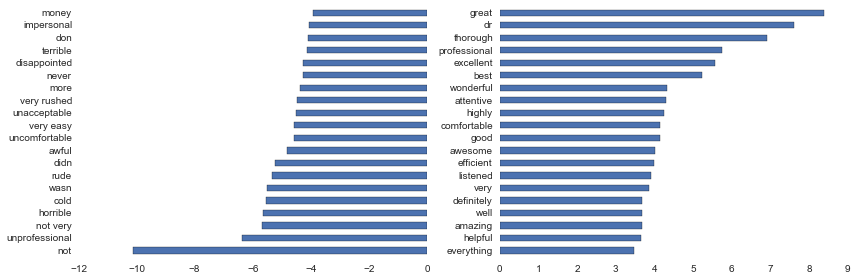

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
coef[:20].plot(kind='barh', ax=axes[0])
coef[-20:].plot(kind='barh', ax=axes[1])
f = plt.tight_layout()